# 02/08/2022 

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("SAheart.csv")

**1.How many records are present in the dataset? Print the metadata information of the dataset.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   row.names  462 non-null    int64  
 1   sbp        462 non-null    int64  
 2   tobacco    462 non-null    float64
 3   ldl        462 non-null    float64
 4   adiposity  462 non-null    float64
 5   famhist    462 non-null    object 
 6   typea      462 non-null    int64  
 7   obesity    462 non-null    float64
 8   alcohol    462 non-null    float64
 9   age        462 non-null    int64  
 10  chd        462 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 39.8+ KB


In [4]:
print("No of records in the data is: "+str(len(data["sbp"])))

No of records in the data is: 462


**2.Draw a bar plot to show the number of persons having CHD or not in comparison to they having
family history of the disease or not?**

In [11]:
k=pd.crosstab(index=data["chd"],columns=data["famhist"])

In [13]:
k

famhist,Absent,Present
chd,,
0,206,96
1,64,96


In [18]:
k.index

Int64Index([0, 1], dtype='int64', name='chd')

In [105]:
sns.countplot(data[data['famhist'] == "Prsent"]['chd'],
color = 'b',
label = 'PRESENT')
sns.countplot(data[data['famhist'] == "Absent"]['chd'],
color = 'g',
label = 'ABSENT');
plt.legend(); 

ValueError: min() arg is an empty sequence

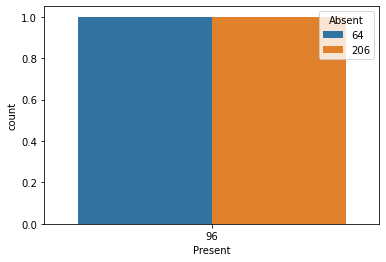

In [76]:
sns.countplot(x="Present",hue="Absent",data=k)

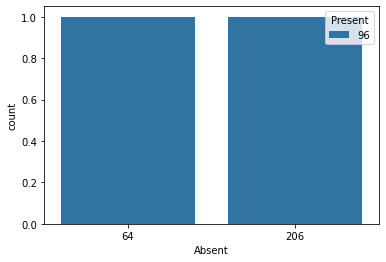

In [77]:
sns.countplot(x="Absent",hue="Present",data=k)

**3.Does age have any correlation with sbp? Choose appropriate plot to show the relationship.**

In [30]:
data["age"].corr(data["sbp"])

0.3887705972765734

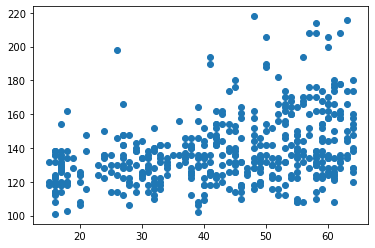

In [31]:
plt.scatter(x=data["age"],y=data["sbp"])

* *it is not significant correlation*

**4.. Compare the distribution of tobacco consumption for persons having CHD and not having CHD.
Can you interpret the effect of tobacco consumption on having coronary heart disease?**

(array([44., 24., 27., 10., 11., 15.,  4., 10.,  5.,  3.,  0.,  1.,  3.,
         0.,  0.,  0.,  1.,  1.,  0.,  1.]),
 array([ 0.  ,  1.56,  3.12,  4.68,  6.24,  7.8 ,  9.36, 10.92, 12.48,
        14.04, 15.6 , 17.16, 18.72, 20.28, 21.84, 23.4 , 24.96, 26.52,
        28.08, 29.64, 31.2 ]),
 <a list of 20 Patch objects>)

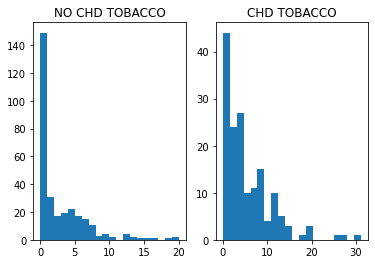

In [39]:

plt.subplot(1,2,1)
plt.title("NO CHD TOBACCO")
plt.hist(data[data["chd"]==0]["tobacco"],bins=20)
plt.subplot(1,2,2)
plt.title("CHD TOBACCO")
plt.hist(data[data["chd"]==1]["tobacco"],bins=20)

 *we can observe that in first plot no of observations at 0 are high, this means people who didnt consume tobacco are free 
from CHD in max cases*

**you can also verify it using avg in each case**

In [37]:
data[data["chd"]==1]["tobacco"].mean()

5.524874999999999

In [38]:
data[data["chd"]==0]["tobacco"].mean()

2.63473509933775

**5.How are the parameters sbp, obesity, age and ldl correlated? Choose the right plot to show the
relationships.**

In [42]:
data[["sbp","obesity","age","ldl"]].corr()

,sbp,obesity,age,ldl
sbp,1.000000,0.238067,0.388771,0.158296
obesity,0.238067,1.000000,0.291777,0.330506
age,0.388771,0.291777,1.000000,0.311799
ldl,0.158296,0.330506,0.311799,1.000000


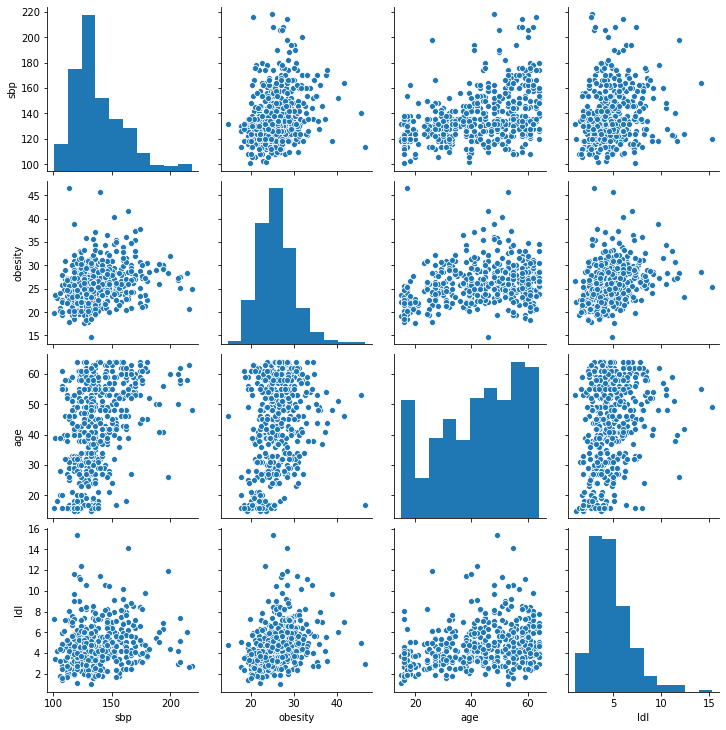

In [44]:
sns.pairplot(data[["sbp","obesity","age","ldl"]])

**6.. Derive a new column called agegroup from age column where persons falling in different age ranges
are categorized as below.
(0–15): young
(15–35): adults
(35–55): mid
(55–): old**

In [46]:
l=[]
for i in range(len(data["age"])):
    if data.loc[i,"age"]>=0 and data.loc[i,"age"]<=14:
        l.append("young")
    elif data.loc[i,"age"]>=15 and data.loc[i,"age"]<=34:
        l.append("adult")
    elif data.loc[i,"age"]>=35 and data.loc[i,"age"]<=54:
        l.append("mid")
    else:
        l.append("old")
        

In [47]:
data["agegroup"]=l

In [48]:
data.head()

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd,agegroup
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1,mid
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1,old
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0,mid
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1,old
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1,mid


**7.Find out the number of CHD cases in different age categories. Do a barplot and sort them in the
order of age groups**


In [49]:
pd.crosstab(index=data["agegroup"],columns=data["chd"])

chd,0,1
agegroup,,
adult,125,18
mid,118,71
old,59,71


C:\Users\NAGENDRA VOORA\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


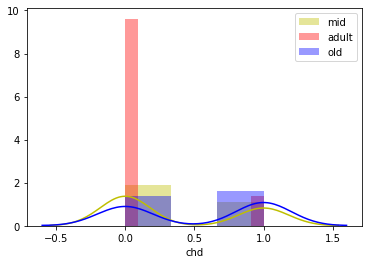

In [102]:
sns.distplot( data[data['agegroup'] == "mid"]['chd'],
color = 'y',
label = 'mid')
sns.distplot( data[data['agegroup'] == "adult"]['chd'],
color = 'r',
label = 'adult');
sns.distplot( data[data['agegroup'] == "old"]['chd'],
color = 'b',
label = 'old');
plt.legend(); 

**8.Draw a box plot to compare distributions of ldl for different age groups.**

{'whiskers': [<matplotlib.lines.Line2D at 0x256b33426a0>,
 'caps': [<matplotlib.lines.Line2D at 0x256b3342d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x256b3342340>],
 'medians': [<matplotlib.lines.Line2D at 0x256b334d460>],
 'fliers': [<matplotlib.lines.Line2D at 0x256b334d760>],
 'means': []}

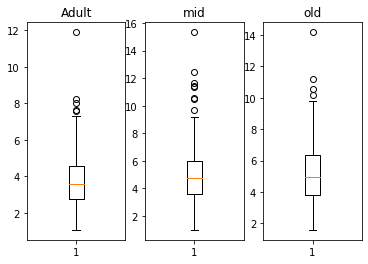

In [62]:
plt.subplot(1,3,1)
plt.title("Adult")
plt.boxplot(data[data["agegroup"]=="adult"]["ldl"])
plt.subplot(1,3,2)
plt.title("mid")
plt.boxplot(data[data["agegroup"]=="mid"]["ldl"])
plt.subplot(1,3,3)
plt.title("old")
plt.boxplot(data[data["agegroup"]=="old"]["ldl"])

In [81]:
data.sample(10)

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd,agegroup
15,16,117,1.53,2.44,28.95,Present,35,25.89,30.03,46,0,mid
434,436,132,0.00,3.55,8.66,Present,61,18.50,3.87,16,0,adult
314,316,190,5.15,6.03,36.59,Absent,42,30.31,72.00,50,0,mid
129,130,152,12.18,4.04,37.83,Present,63,34.57,4.17,64,0,old
461,463,132,0.00,4.82,33.41,Present,62,14.70,0.00,46,1,mid
403,405,208,5.04,5.19,20.71,Present,52,25.12,24.27,58,1,old
200,201,124,0.16,2.44,16.67,Absent,65,24.58,74.91,23,0,adult
366,368,150,0.00,4.99,27.73,Absent,57,30.92,8.33,24,0,adult
122,123,120,0.00,5.01,26.13,Absent,64,26.21,12.24,33,0,adult
266,268,118,0.12,4.16,9.37,Absent,57,19.61,0.00,17,0,adult
